In [ ]:
!pip install pandas numpy matplotlib seaborn kaggle


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget
import os


In [ ]:
import wget
import pandas as pd
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=50000"
df = pd.read_csv(url)


In [ ]:
df.head()




,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"\n, \n(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"\n, \n(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the date and time columns to datetime
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M:%S').dt.time # Try parsing with seconds

# Extract hour and day of the week for analysis
df['hour'] = pd.to_datetime(df['crash_time'], format='%H:%M:%S').dt.hour # Use the updated format here as well
df['day_of_week'] = df['crash_date'].dt.dayofweek
df['month'] = df['crash_date'].dt.month

# Display basic statistics
df[['hour', 'day_of_week', 'month']].describe()

,hour,day_of_week,month
count,50000.000000,50000.00000,50000.000000
mean,12.842040,3.03456,6.449580
std,6.299467,1.97030,2.910269
min,0.000000,0.00000,1.000000
25%,8.000000,1.00000,5.000000
50%,14.000000,3.00000,6.000000
75%,18.000000,5.00000,9.000000
max,23.000000,6.00000,12.000000


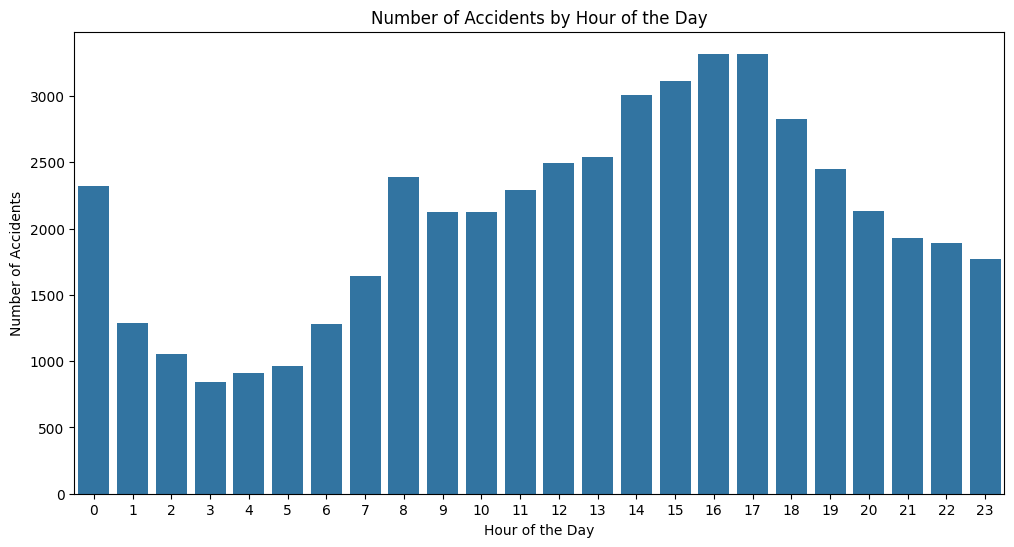

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df)
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()



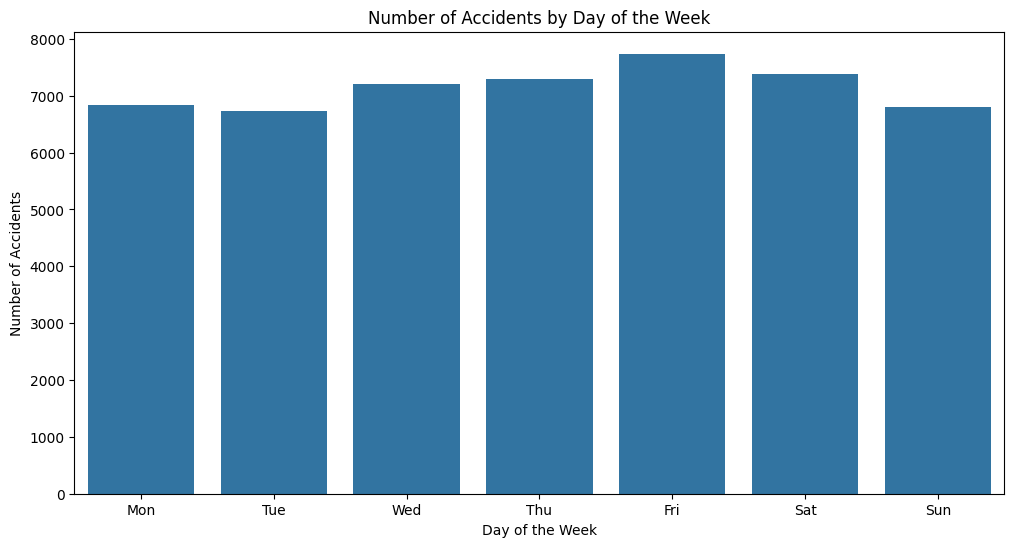

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12,6))
sns.countplot(x='day_of_week', data=df)
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
